In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from scipy import stats
sns.set()
#importamos las librerias que vamos a usar

In [2]:
# #subimos el dataset que vamos a trabajar

# from google.colab import files
# import io


# uploaded= files.upload()
# archivo= io.BytesIO(uploaded["spotify_data2.csv"])

In [3]:
#abrimos el dataset que vamos a trabajar
# df= pd.read_csv("C:/Users/usuario/Desktop/proyectos propios/Spotify/spotify_data2.csv")

In [4]:
# asignamos el dataset a una variable y lo transformamos a dataframe
archivo= pd.read_csv("spotify_data2.csv")
df= pd.DataFrame(archivo)
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


### Limpieza y Formato

In [5]:
# hacemos una copia del dataset original
# print(df.columns)
# print(len(df.columns))
df1=df.copy()

In [6]:
# renombramos algunas columnas para mayor agilidad y practicidad
df1= df1.rename(columns= {'artist_name': "Artista"})
df1= df1.rename(columns= {'track_name': "Cancion"})
df1= df1.rename(columns= {'track_id': "ID"})
df1= df1.rename(columns= {"popularity": "Popularidad"})
df1= df1.rename(columns= {'year': "Año"})
df1= df1.rename(columns= {"genre": "Genero"})
# df1.head(1)
df1.columns


Index(['Artista', 'Cancion', 'ID', 'Popularidad', 'Año', 'Genero',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
# reseña general del dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artista           150000 non-null  object 
 1   Cancion           150000 non-null  object 
 2   ID                150000 non-null  object 
 3   Popularidad       150000 non-null  int64  
 4   Año               150000 non-null  int64  
 5   Genero            150000 non-null  object 
 6   danceability      150000 non-null  float64
 7   energy            150000 non-null  float64
 8   key               150000 non-null  int64  
 9   loudness          150000 non-null  float64
 10  mode              150000 non-null  int64  
 11  speechiness       150000 non-null  float64
 12  acousticness      150000 non-null  float64
 13  instrumentalness  150000 non-null  float64
 14  liveness          150000 non-null  float64
 15  valence           150000 non-null  float64
 16  tempo             15

In [8]:
# nos fijamos si existen valores nulos en el dataframe
df1.isnull().sum()

Artista             0
Cancion             0
ID                  0
Popularidad         0
Año                 0
Genero              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [9]:
# nos fijamos si existen filas/instancias repetidas en el dataframe
df1.duplicated().sum()

0

In [10]:
# nos fijamos las dimensiones de nustro dataframe
df1.dropna()
df1.shape

(150000, 19)

In [11]:
#desechamos columnas que no vamos a utilizar

df1= df1.drop(columns= ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'])

# EDA

In [12]:
df1.columns

Index(['Artista', 'Cancion', 'ID', 'Popularidad', 'Año', 'Genero'], dtype='object')

In [13]:
df1.describe()

,Popularidad,Año
count,150000.000000,150000.00000
mean,17.734547,2012.91460
std,14.317419,0.79871
min,0.000000,2012.00000
25%,6.000000,2012.00000
50%,15.000000,2013.00000
75%,27.000000,2014.00000
max,91.000000,2014.00000


# Artistas

###Artistas con mas canciones subidas

Cantidad de artistas diferentes: 19503
Artista mas prolifico: Glee Cast, con 518 canciones subidas


Artistas con mas subidas (primeros 5): 
Glee Cast        518
Grateful Dead    374
Nature Sounds    277
Roberto Firpo    266
Massage Tribe    227
Name: Artista, dtype: int64



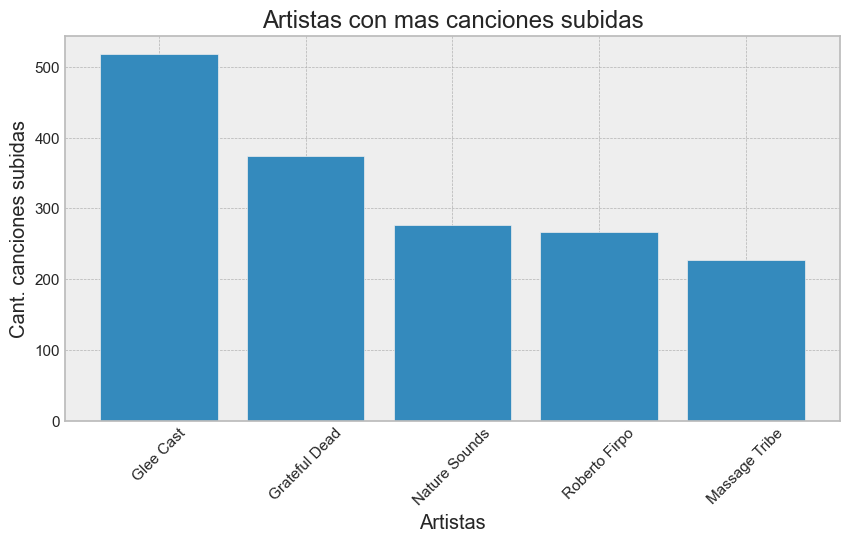

In [14]:
print(f"Cantidad de artistas diferentes: {len(df1.Artista.value_counts())}")
maximo=df1.Artista.value_counts().nlargest(40).max()
artista_max= df1.Artista.value_counts().nlargest(40).idxmax()
print(f"Artista mas prolifico: {artista_max}, con {maximo} canciones subidas\n")

lista= list(df1.Artista.value_counts().nlargest(5).index)
lista_mas_subidas= df1.Artista.value_counts().nlargest(5)
print(f"\nArtistas con mas subidas (primeros 5): \n{lista_mas_subidas}\n")

plt.style.use("bmh")
plt.figure(figsize= (10,5))
plt.bar(lista_mas_subidas.index, lista_mas_subidas)
plt.title("Artistas con mas canciones subidas")
plt.xticks(rotation= 45)
plt.xlabel("Artistas")
plt.ylabel("Cant. canciones subidas")





plt.show()


In [15]:
### ejemplo con un artista en particular
temp=df1[df1.Artista == "Roberto Firpo"]## valores del dataframe donde el artista es Roberto Firpo
temp.Cancion.value_counts()## cuantas frecuencias hay de cada cancion
len(np.unique(temp.Cancion))## cuantas canciones hay
### con esto vemos que el dataframe refiere a las canciones lanzadas/subidas por cada artista en un rango de tiempo de 3 años en la plataforma spotify

266

###Ranking de Popularidad de artistas en cada año

In [16]:
### ranking de popularidad de artistas en cada año
muestra= df1[["Artista", "Popularidad", "Año"]] ## trabajamos con las siguientes columnas
años= muestra.Año.value_counts().index ## de que años son los datos de la muestra
año_12= muestra[muestra.Año == 2012] ## aca dividimos el dataset de manera manual ya que contiene 150000 instancias diferentes en donde debemos a su vez realizar distintas busquedas, lo que nos retrasa mucho el procesamiento en el dataset completo
año_13=muestra[muestra.Año == 2013]
año_14=muestra [muestra.Año == 2014]
artistas= muestra.Artista.value_counts().index ## obtenemos los diferentes artistas que lanzaron/subieron canciones en toda la muestra.

    # for row in año_12: ## iteramos sobre la muestra que refiere al año 2012
    #   total= sum(año_12.Popularidad) ## obtenemos la sumatoria de valores de la columna popularidad
    #   nombres= [] ## iniciamos una lista vacia para guardar los nombres de los artistas que iteramos y que subieron canciones en dicho año
    #   resultados= []## iniciamos una lista vacia donde guardamos el resultado de la sumatoria de los valores de popularidad del artista iterado
    #   for artista in artistas:## iniciamos un loop refiriendonos a los nombres de los artistas en la lista artistas
    #     suma= sum(año_12.Popularidad[año_12.Artista == artista])## aqui realizamos la sumatoria de todos los valores de popularidad que pertenecen al artista iterado
    #     if suma > 1000:## establecemos que deben ser a partir de un puntaje mayor a 1000 de popularidad sumada.
    #         nombres.append(artista)
    #         resultados.append(suma)

In [17]:
def ranking_artistas(data, list_artistas, año):## creamos una funcion que mida el ranking de los artistas mas populares por año
    for row in data: ## iteramos sobre la muestra que refiere al año
      total= sum(data.Popularidad) ## obtenemos la sumatoria de valores de la columna popularidad
      nombres= [] ## iniciamos una lista vacia para guardar los nombres de los artistas que iteramos y que subieron canciones en dicho año
      resultados= []## iniciamos una lista vacia donde guardamos el resultado de la sumatoria de los valores de popularidad del artista iterado
      for artista in list_artistas:## iniciamos un loop refiriendonos a los nombres de los artistas en la lista artistas
          suma= sum(data.Popularidad[data.Artista == artista])## aqui realizamos la sumatoria de todos los valores de popularidad que pertenecen al artista iterado
          if suma > 1000:## establecemos que deben ser a partir de un puntaje mayor a 1000 de popularidad sumada.
              nombres.append(artista)
              resultados.append(suma)
    tabla= pd.Series(resultados, index= nombres).nlargest(10)## creamos una serie donde los artistas van a ser los indices y los valores seran la sumatoria total de popularidad de cada artista
    tabla_porc= tabla.apply(lambda x: (x/total)*100)## establecemos el porcentaje que representa la popularidad de cada artista
    print(f"Ranking artistas más populares(2012)\n\n{tabla}\n\n", f"Porcentajes\n\n{tabla_porc}")

    # Visualizacion
    plt.figure(figsize= (20,10))
    plt.bar(tabla_porc.index, tabla_porc)
    plt.title(f"Artistas mas populares ({año})")
    plt.xlabel("Artista\n(10 primeros)")
    plt.ylabel("Porcentaje\n(sobre el total del año)")

    plt.show()

    return



Ranking artistas más populares(2012)

Glee Cast         9108
Nature Sounds     3651
One Direction     2316
Massage Tribe     2289
Boyce Avenue      2039
The Beach Boys    1868
Pritam            1747
Vybz Kartel       1546
Lana Del Rey      1432
Ramin Djawadi     1391
dtype: int64

 Porcentajes

Glee Cast         1.015984
Nature Sounds     0.407264
One Direction     0.258346
Massage Tribe     0.255335
Boyce Avenue      0.227447
The Beach Boys    0.208373
Pritam            0.194875
Vybz Kartel       0.172454
Lana Del Rey      0.159737
Ramin Djawadi     0.155164
dtype: float64


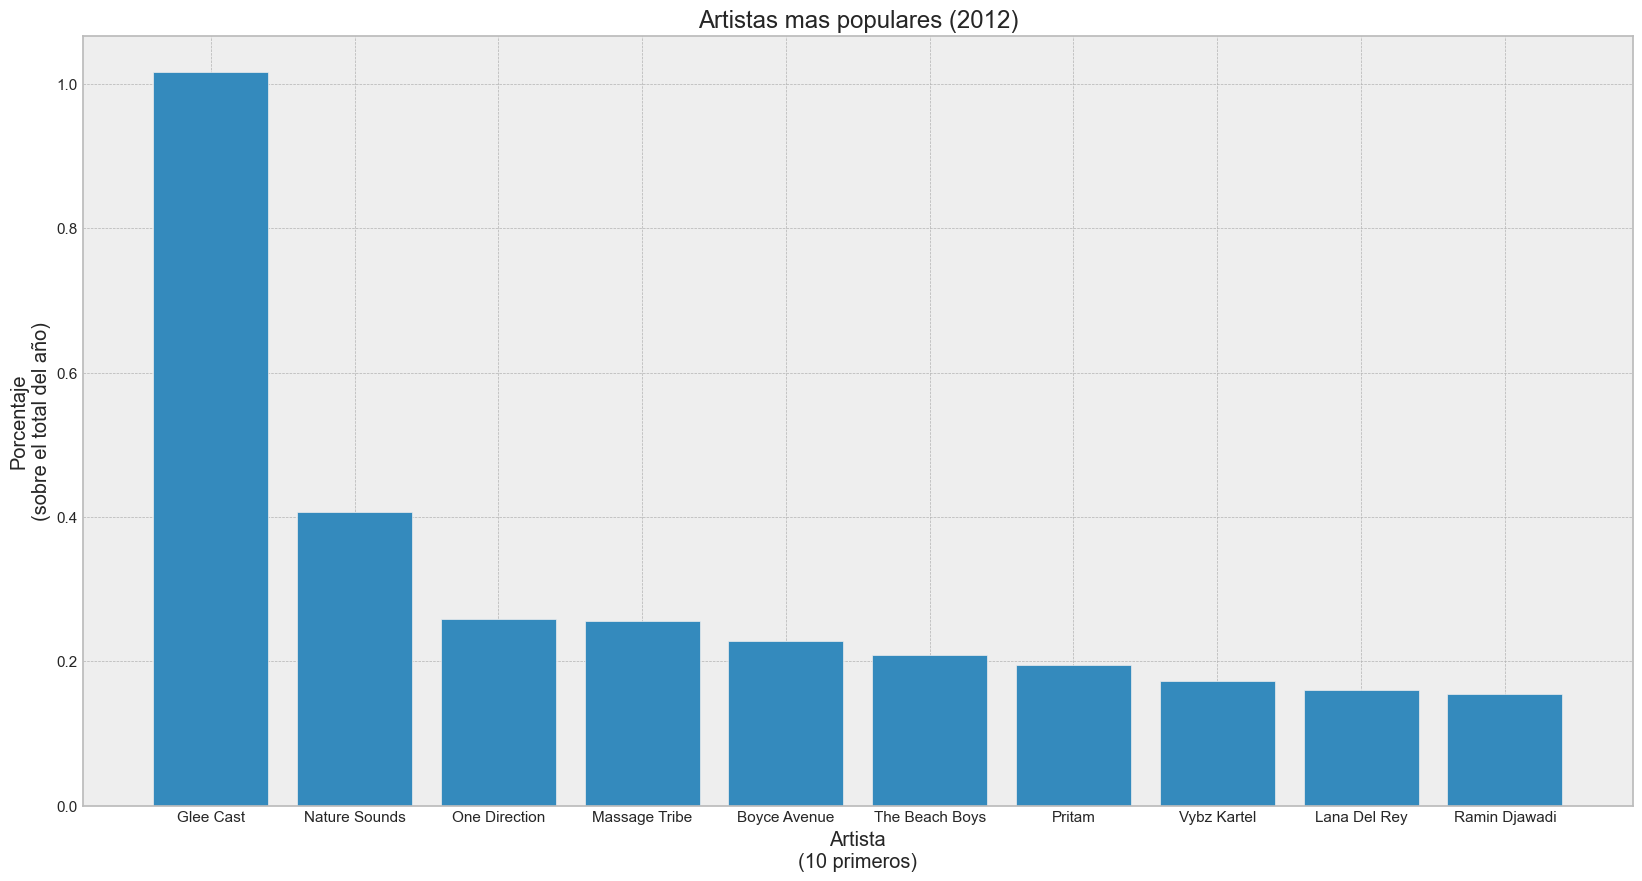

In [18]:
ranking_artistas(año_12,artistas,2012)## aplicamos la funcion a la muestra correspondiente al año 2012

In [19]:
# ranking_artistas(año_13,artistas)

In [20]:
# ranking_artistas(año_14,artistas)

###Artista mas popular y ranking de artistas mas populares

In [21]:
### artista mas popular y ranking de artistas mas populares

muestra= df1[["Artista", "Popularidad", "Año"]] ## trabajamos con las siguientes columnas
for row in muestra: ## iteramos sobre la muestra
  total= sum(muestra.Popularidad) ## obtenemos la sumatoria de valores de la columna popularidad
  nombres= [] ## iniciamos una lista vacia para guardar los nombres de los artistas que iteramos y que subieron canciones
  resultados= []## iniciamos una lista vacia donde guardamos el resultado de la sumatoria de los valores de popularidad del artista iterado
  for artista in artistas:## iniciamos un loop refiriendonos a los nombres de los artistas en la lista artistas
     suma= sum(muestra.Popularidad[muestra.Artista == artista])## aqui realizamos la sumatoria de todos los valores de popularidad que pertenecen al artista iterado
     if suma > 2000:## establecemos que deben ser a partir de un puntaje mayor a 2000 de popularidad sumada.
        nombres.append(artista)
        resultados.append(suma)


Ranking artistas más populares(total de muestra))

Glee Cast                15521
Hans Zimmer               4992
Grateful Dead             4989
Nature Sounds             4768
One Direction             4604
Johann Sebastian Bach     4340
Vybz Kartel               3665
Pritam                    3431
Ramin Djawadi             3229
Massage Tribe             3108
dtype: int64

 Porcentajes

Glee Cast                0.583456
Hans Zimmer              0.187656
Grateful Dead            0.187544
Nature Sounds            0.179236
One Direction            0.173071
Johann Sebastian Bach    0.163147
Vybz Kartel              0.137773
Pritam                   0.128976
Ramin Djawadi            0.121383
Massage Tribe            0.116834
dtype: float64


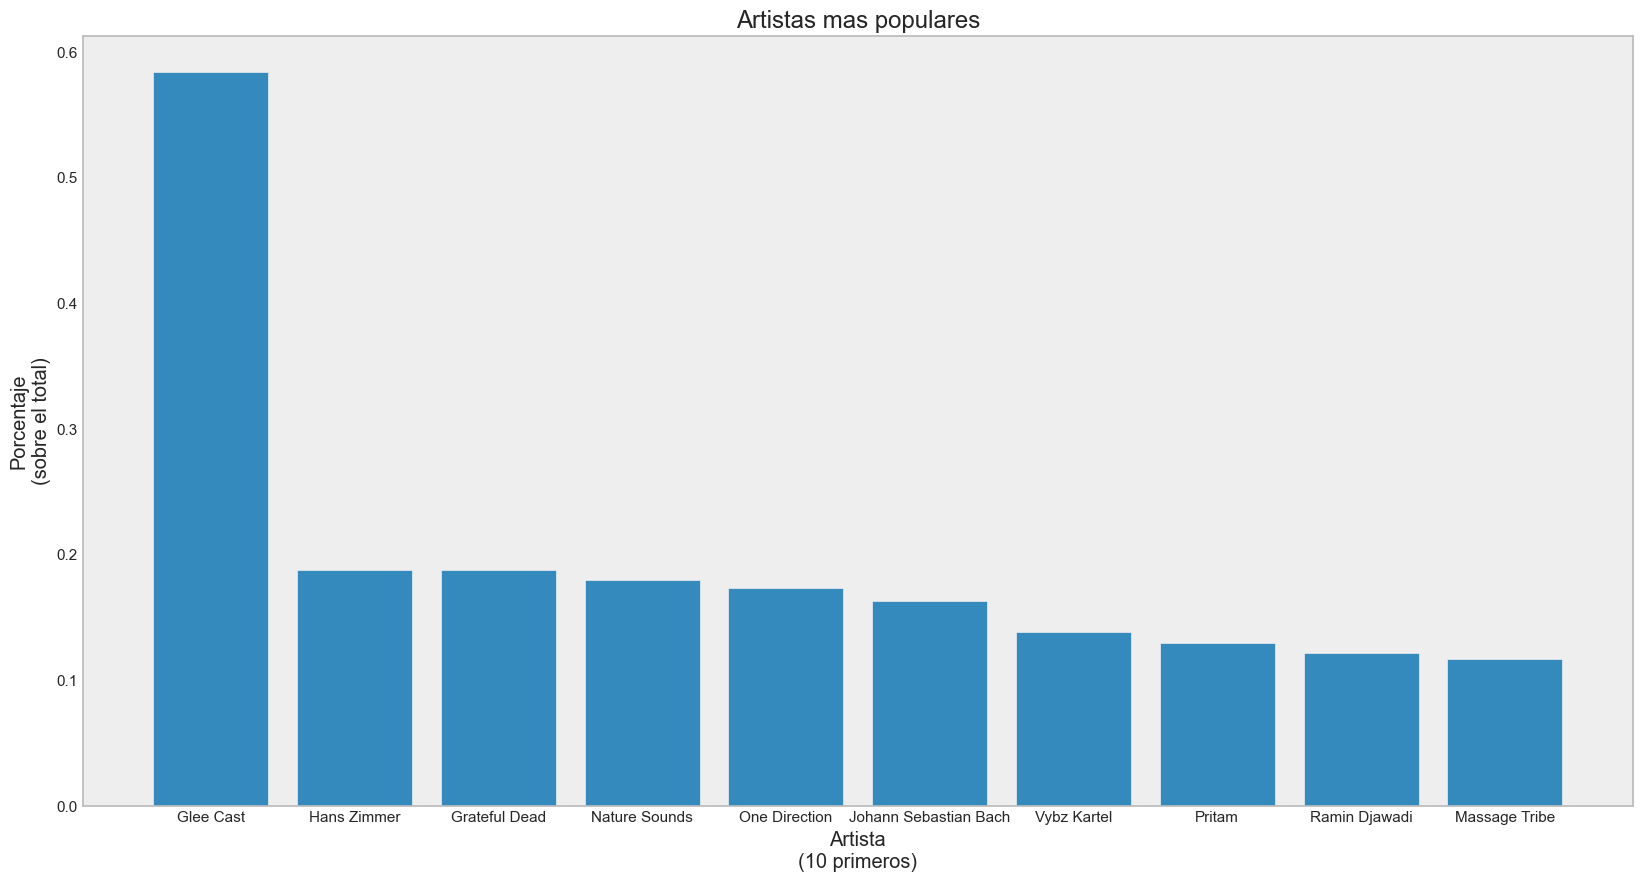



El artista mas popular es Glee Cast con el 0.5834563199059313% de popularidad  del total de artistas en el periodo desde al año 2012 al año 2014


In [22]:
total= sum(muestra.Popularidad)### sumatoria de todos los valores de popularidad
tabla= pd.Series(resultados, index= nombres).nlargest(10)## creamos una serie donde los artistas van a ser los indices y los valores seran la sumatoria total de popularidad de cada artista
tabla_porc= tabla.apply(lambda x: (x/total)*100)## establecemos el porcentaje que representa la popularidad de cada artista
print(f"Ranking artistas más populares(total de muestra))\n\n{tabla}\n\n", f"Porcentajes\n\n{tabla_porc}")
# visualizacion

plt.figure(figsize= (20,10))
plt.bar(tabla_porc.index, tabla_porc)
plt.title(f"Artistas mas populares")
plt.xlabel("Artista\n(10 primeros)")
plt.ylabel("Porcentaje\n(sobre el total)")

plt.grid()
plt.show()

print(f"\n\nEl artista mas popular es {tabla_porc.idxmax()} con el {tabla_porc.max()}% de popularidad  del total de artistas en el periodo desde al año 2012 al año 2014")

# Canciones

In [23]:
conteo_name= df1.Cancion.value_counts()
name= len(df1.Cancion.value_counts())
cant_canciones= df1.Cancion.value_counts().sum()  ## frecuencia acumulada de cada nombre cancion en el dataframe
# intro= df1[df1.Cancion == "Intro"]
# intro.head()
# intro.Genero.value_counts()



## estos resultados nos permiten comprobar que existen titulos de canciones que son comun a diferentes canciones(es decir el mismo nombre para diferentes canciones) o que pueden ser covers de la cancion origina.

###Ranking canciones mas populares cada año

In [24]:
### Ranking canciones mas populares

# df_12= df1[df1.Año == 2012]
# mas_populares_12= df_12.Popularidad.nlargest(5)  ## indices de los 5 valores de popularidad mas altos de canciones en el año 2012
# # print(mas_populares_12)
# # print(df_12.Popularidad.idxmax()) ## corroboramos que los indices numericos y valores sean correctos
# indices_12=[]
# for indice in mas_populares_12.index: ### creamos un loop donde tomando como referencia los indices obtenidos, ubicamos el nombre de la cancion
#   temp=df1.Cancion[indice]
#   indices_12.append(temp)

# # print(indices)
# mas_populares_12.index = indices_12  ### reemplazamos y emparejamos con su correspondiente valor, los indices numericos con el valor/nombre de la cancion
# print("Ranking canciones mas populares(2012)\n")
# print(mas_populares_12)

def ranking_canciones(años):### creamos una funcion que realice el codigo para los distintos años
  if type(años) != list:
    años= [años]
  for x in años:
     temp= df1[df1.Año == x]### seleccionamos el año en cuestion
     mas_populares= temp.Popularidad.nlargest(5)##indices de los 5 valores de popularidad mas altos de canciones en el año
     indices=[]### lista donde se guardaran los nombres de las canciones
     for indice in mas_populares.index: ### creamos un loop donde tomando como referencia los indices obtenidos, ubicamos el nombre de la cancion
        a=df1.Cancion[indice] ### obtenemos el nombre de la cacnion en referencia al indice del valor correspondiente
        indices.append(a)
     mas_populares.index = indices ### reemplazamos los valores numericos de los indices por el nombre de las canciones
     print(f"Ranking canciones mas populares({x})\n")
     print(mas_populares, "\n\n")

  return

In [25]:
canciones_2012= ranking_canciones(2012)
canciones_2013= ranking_canciones(2013)
canciones_2012= ranking_canciones(2014)

Ranking canciones mas populares(2012)

When I Was Your Man         87
Locked out of Heaven        85
Lost                        82
What Makes You Beautiful    82
Timber (feat. Ke$ha)        80
Name: Popularidad, dtype: int64 


Ranking canciones mas populares(2013)

I Wanna Be Yours                            91
Do I Wanna Know?                            86
Why'd You Only Call Me When You're High?    85
Wake Me Up                                  84
All of Me                                   83
Name: Popularidad, dtype: int64 


Ranking canciones mas populares(2014)

No Role Modelz          87
Night Changes           86
Lovers Rock             85
The Nights              84
I'm Not The Only One    84
Name: Popularidad, dtype: int64 




### Cancion más popular

In [26]:
print("La cancion mas popular en el dataset es:\n")
max= df1[(df1.Cancion.index == df1.Popularidad.idxmax())]

max

La cancion mas popular en el dataset es:



,Artista,Cancion,ID,Popularidad,Año,Genero
77591,Arctic Monkeys,I Wanna Be Yours,5XeFesFbtLpXzIVDNQP22n,91,2013,garage


# Genero

In [27]:
df1.Genero.value_counts()
len(df1.Genero.value_counts()) ## cantidad de generos diferentes en el dataset
list_generos= np.unique(df1.Genero) ## cuales son los generos en el dataset(valores unicos)
print(f"  Hay {len(df1.Genero.value_counts())} generos musicales diferentes en la muestra:\n")
print(f"{list_generos}")

  Hay 82 generos musicales diferentes en la muestra:

['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


### Géneros con más alto promedio de popularidad

Ranking Generos más populares


pop: 56.43%
rock: 47.4%
hip-hop: 44.48%
dance: 43.87%
indie-pop: 38.68%
metal: 38.27%
alt-rock: 38.26%
electro: 37.04%
folk: 34.66%
house: 31.79%


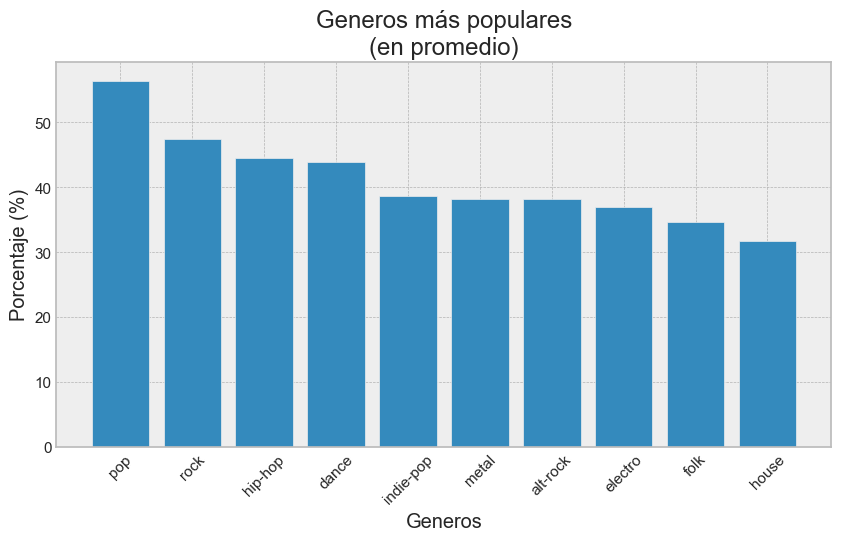

In [28]:
temp= df1[["Genero", "Popularidad"]]## trabajamos solo con dos columnas del dataset y las asignamos a una nueva variable
mean_popular= temp.groupby(["Genero"]).mean()## agrupamos en base a los diferentes generos todos los valores correspondientes a cada uno y luego aplicamos la funcion para sacar el promedio(media) de cada uno.
# gen_popular= df1.Genero.value_counts().nlargest(5)
# temp= list(gen_popular.index)

print("Ranking Generos más populares\n\n")
temp= mean_popular.Popularidad.nlargest(10)## generamos una variable con un objeto donde se especifican los 10 generos con mayor valor promedio de popularidad.
for x, y in zip(temp.index, temp):
  row= x, round(y, 2)
  print(f"{row[0]}: {row[1]}%")
## aclaracion: en este caso, cuando sacamos el promedio de popularidad de cada genero, aplicamos la formula sobre la cantidad total de datos QUE PERTENECEN A ESE GENERO, no sobre el total de los datos de la muestra.




### visualizacion
muestra= mean_popular.Popularidad.nlargest(10).apply(lambda x: round(x, 2))### asignamos a la variable muestra los 10 valores mas altos de la columna popularidad redondeados a 2 decimales.
plt.figure(figsize= (10,5)) ## dimensiones/tamaño del grafico
plt.bar(muestra.index, muestra) ## tipo de grafico a plotear, en este caso un grafico de barras
plt.xticks(rotation= 45) ##rotacion de etiquetas/categorias en el eje x en 45 grados
plt.title("Generos más populares\n(en promedio)")
plt.xlabel("Generos")
plt.ylabel("Porcentaje (%)")




plt.show()

###Generos más populares (sobre el total de la muestra)

In [29]:
temp= df1[["Genero", "Popularidad"]]

# muestra= mean_popular.Popularidad.nlargest(10).apply(lambda x: round(x, 2))
# a= muestra.Popularidad.value_counts().nlargest(10)#### esta linea de codigo esta viciada, ya que aqui vemos que la puntuacion de popularidad acumulada del genero "Heavy-metal" es la mas alta, lo que la incrementa tanto es la cantidad de  instancias de este genero

conjunto= [] ## declaramos una variable tipo lista vacia
for x in temp.Genero:  ## iniciamos un loop iterando sobre los valores de genero
  conjunto.append(x)## agreagamos cada valor de genero a la lista declarada previamente
conjunto= set(conjunto) ## redefinimos el tipo de valor en la variable conjunto: de lista a tupla/conjunto, hacemos esto ya que una de las propiedades de la tupla es que no acepta valores duplicados, por lo que obtendremos los valores unicos iterados
print(f"etiquetas de conjuntos: {conjunto}")
print(f"cantidad de generos: {len(conjunto)}")
total= 0  ## declaramos e inicializamos una variable tipo int, con el valor 0
porcentajes= []## declaramos una variable tipo lista vacia
for x in conjunto:  ## iniciamos un bucle donde iteramos los elementos contenidos en el conjunto declarado anteriormente
  suma= 0.0 ## declaramos una variable tipo float y la inicializamos en 0.0
  for indice in temp.index:  ## sobre el genero iterado realizamos otra iteracion sobre cada indice de la tabla de genero/popularidad(recordemos que en esta tabla se agruparon todos los valores que pertenecen a cada genero respectivamente, pero no se sumaron entre ellos)
    if temp.Genero[indice] == x:
      suma += temp.Popularidad[indice] ### realizamos la sumatoria de cada valor de popularidad que corresponda al mismo genero
  operacion= (suma/df1.Popularidad.sum())*100  ## sacamos el porcentaje que el valor de la sumatoria representa con respecto al total de la muestra.
  porcentajes.append(operacion)### guardamos el porcentaje en la lista previamente declarada
  row= (x, operacion) ## empaquetamos el valor del genero con el porcentaje previamente sacado
  # print(row)
  total += operacion ## creamos una variable que nos sirva de control para ver si la sumatoria de porcentajes es correcta(y con ello si las operaciones y asignaciones estan correctamente establecidas)

print("porcentaje total de respaldo:", total)





## esto es un promedio general de la popularidad de todos los generos en la muestra y corresponde sobre el lapso total de la muestra(es decir la popularidad de los generos en los 3 años que abarca la muestra sobre el total de las observaciones)

etiquetas de conjuntos: {'club', 'german', 'hardcore', 'power-pop', 'samba', 'rock-n-roll', 'dubstep', 'sertanejo', 'pop', 'punk-rock', 'psych-rock', 'trance', 'breakbeat', 'grindcore', 'groove', 'soul', 'french', 'guitar', 'funk', 'blues', 'edm', 'progressive-house', 'dub', 'industrial', 'k-pop', 'afrobeat', 'hardstyle', 'show-tunes', 'swedish', 'songwriter', 'country', 'indian', 'party', 'death-metal', 'deep-house', 'indie-pop', 'dancehall', 'rock', 'trip-hop', 'drum-and-bass', 'chill', 'punk', 'techno', 'acoustic', 'comedy', 'ska', 'singer-songwriter', 'emo', 'ambient', 'piano', 'house', 'chicago-house', 'folk', 'pop-film', 'hard-rock', 'metalcore', 'gospel', 'classical', 'heavy-metal', 'metal', 'garage', 'goth', 'forro', 'minimal-techno', 'electro', 'alt-rock', 'opera', 'salsa', 'sleep', 'electronic', 'cantopop', 'spanish', 'dance', 'jazz', 'romance', 'tango', 'hip-hop', 'black-metal', 'sad', 'disco', 'detroit-techno', 'new-age'}
cantidad de generos: 82
porcentaje total de respaldo

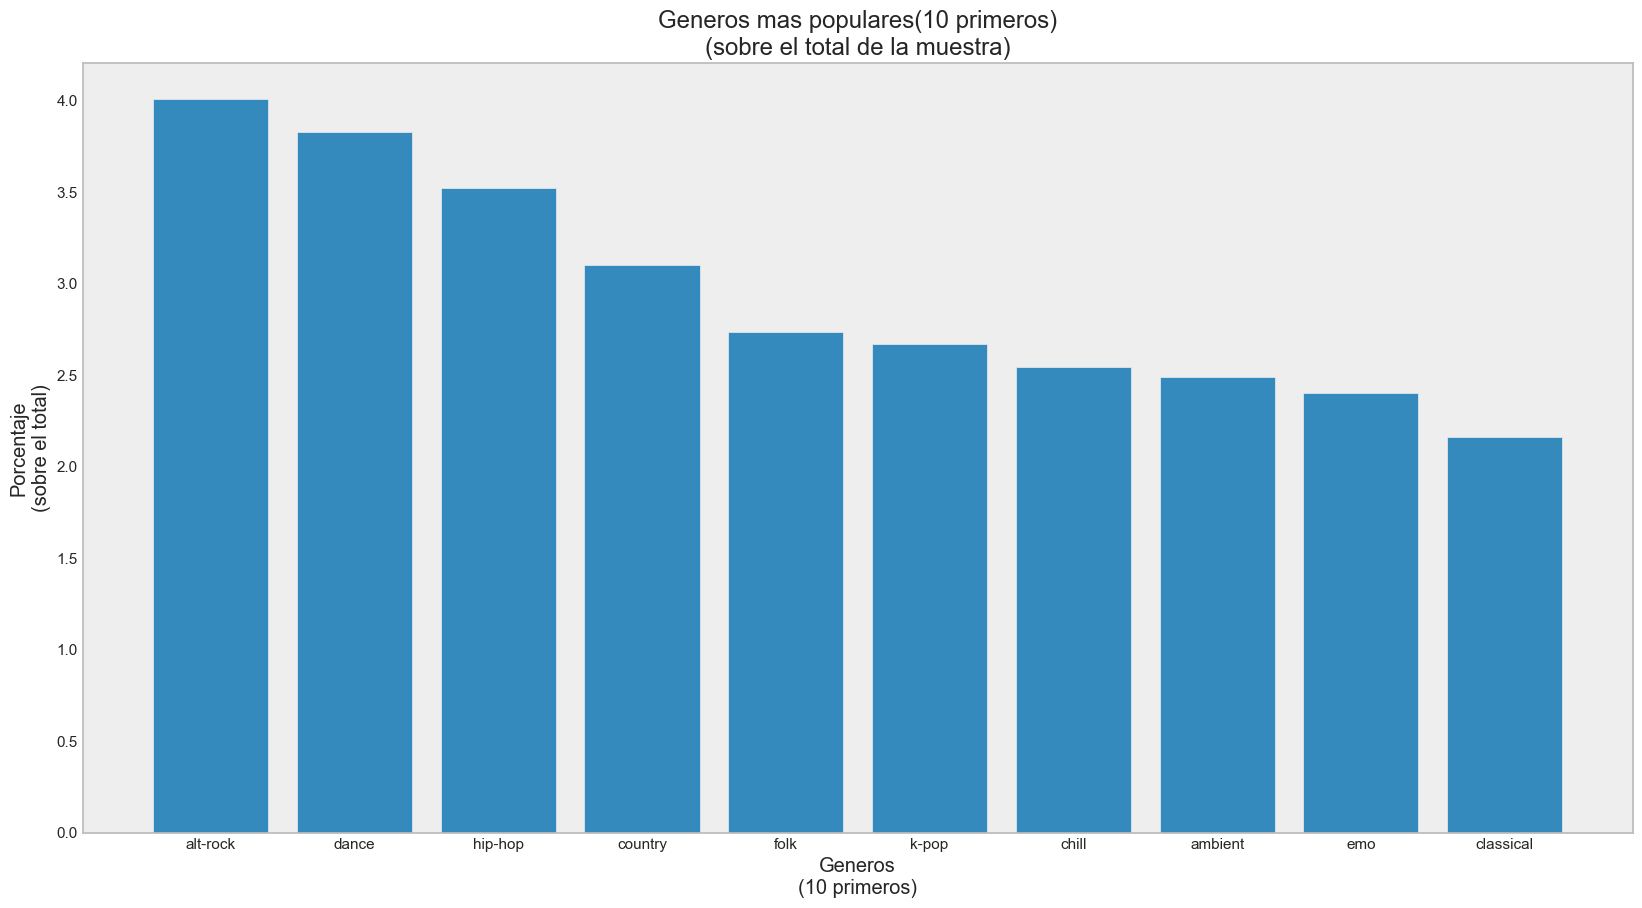

In [30]:
##visualizacion
tabla= pd.Series(porcentajes, index= conjunto)
temp= tabla.nlargest(10)

plt.figure(figsize= (20,10))
plt.bar(temp.index, temp)
# plt.bar(list(conjunto), porcentajes)
# plt.xticks(rotation= 90)
plt.title("Generos mas populares(10 primeros)\n(sobre el total de la muestra)")
plt.xlabel("Generos\n(10 primeros)")
plt.ylabel("Porcentaje\n(sobre el total)")

plt.grid()
plt.show()

# Investigacion



*   informar la cantidad de apariciones de los artistas Roberto Firpo y Richard Wagner retornando
    cada valor en un dato de tipo tupla (Cantidad apariciones Roberto Firpo, Cantidad apariciones Roberto Firpo).
*   informar la cantidad años únicos que están presenten en la columna Year
    retornando ese valor en un dato de tipo entero.
*   informar cuál es el género con la mayor popularidad promedio en el dataset. Retornando
    cada valor en un dato de tipo tupla ('genre', popularidad promedio).
    El valor promedio debe tener 2 cifras significativas
*   Para el año 2014, que cantidad de apariciones en canciones de Spotify tuvo el músico, compositor
    y productor Phil Coulter







###¿Cuantas apariciones tuvieron los artistas Roberto Firpo y Richard Wagner?

In [31]:
# cuantas apariciones tuvieron los artistas Roberto Firpo y Richard Wagner

Roberto_Firpo= len(df1[df1.Artista == "Roberto Firpo"].index)  ### mediante una condicion booleana y asignandola al indice del dataframe original, obtenemos los valores que cumple con ese valor,luego obtenemos sus indices en una lista y contamos la cantidad de elementos que hay en ella
Richard_Wagner= len(df1[df1.Artista == "Richard Wagner"].index)
print(f"la cantidad de apariciones es de: {Roberto_Firpo} para Roberto_Firpo y {Richard_Wagner} para Richard_Wagner")

la cantidad de apariciones es de: 266 para Roberto_Firpo y 188 para Richard_Wagner


###¿A que periodo de tiempo pertenecen los datos de la muestra?

las muestras corresponden a un periodo de 3 años: [2012 2013 2014], con la siguiente asignacion de reproducciones:




En el año 2012, hubo 54797 reproducciones que representan el 37% de la muestra
En el año 2013, hubo 53216 reproducciones que representan el 35% de la muestra
En el año 2014, hubo 41987 reproducciones que representan el 28% de la muestra





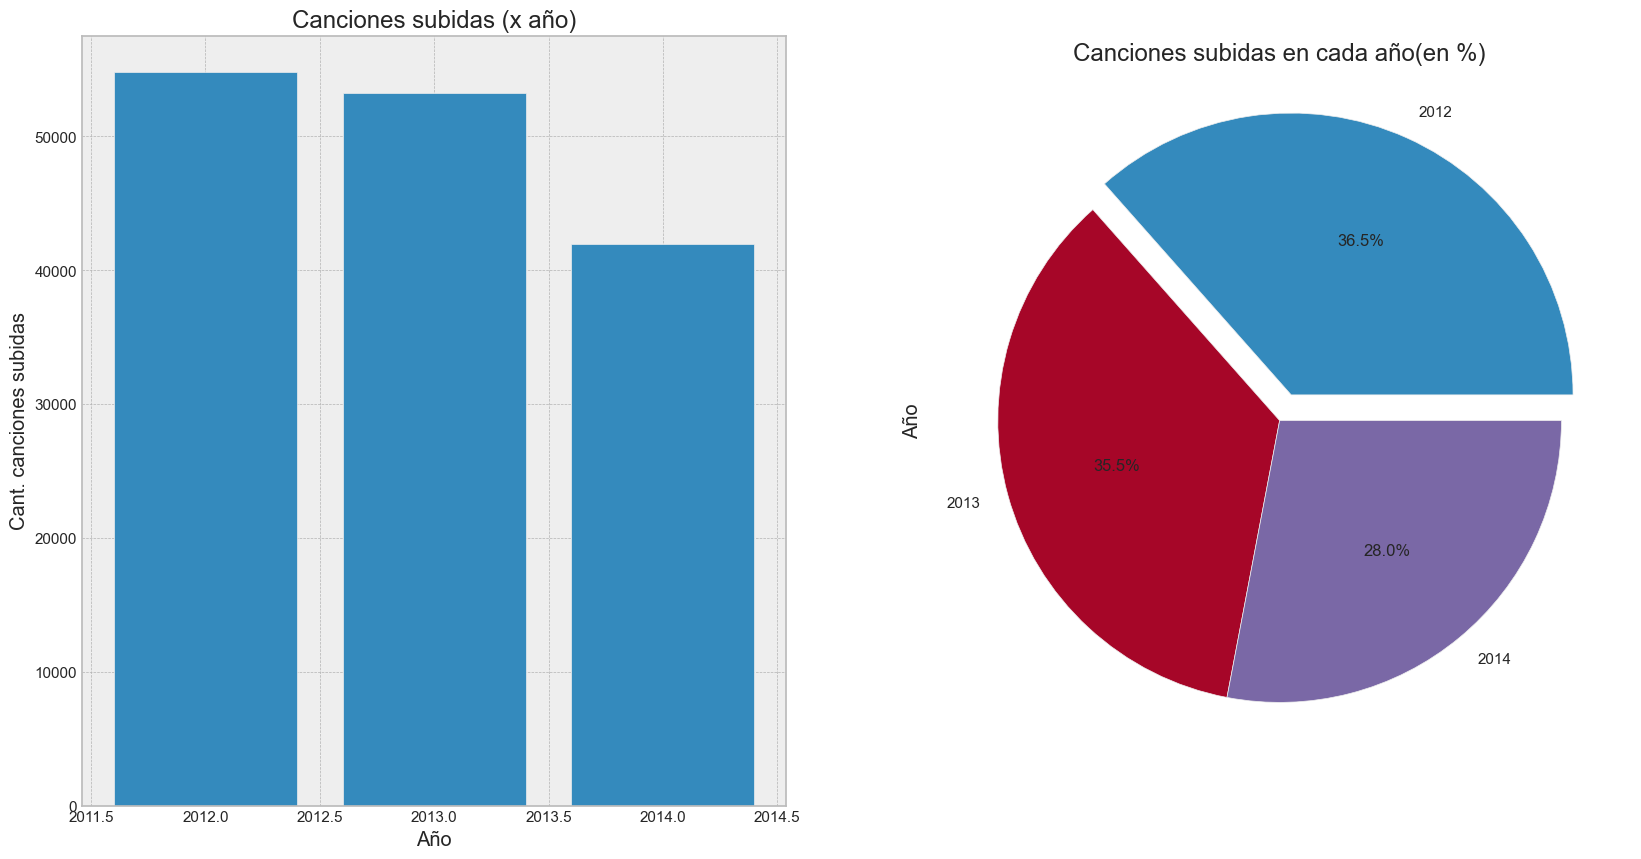

In [32]:
#  a que periodo de tiempo pertenecen los datos de la muestra?

Años, frecuencias=np.unique(df1.Año, return_counts= True) ### generamos los valores unicos de la columna años, y obtenemos su frecuencia absoluta acumulada
# print(f"las muestras corresponden a un periodo de {len(Años)}: {Años[0]}, {Años[1]}, {Años[2]}")
print(f"las muestras corresponden a un periodo de {len(Años)} años: {Años}, con la siguiente asignacion de reproducciones:\n\n")

for x,y in zip(Años,frecuencias): ### agrupamos ambas variables y desempaquetamos sus valores en progresion con un bucle
  muestra= [x,y] ## agrupamos los valores individuales de la iteracion en una unica variable
  porcentaje= int(round(y/sum(frecuencias),2)*100)### realizamos el porcentaje de frecuencias del año correspondiente
  print(f"En el año {x}, hubo {y} reproducciones que representan el {porcentaje}% de la muestra")

## visualizacion
print("\n\n")
plt.style.use("bmh")
plt.figure(figsize= (20,10))

temp=df1.Año.value_counts().index
plt.subplot(1,2,1)
plt.bar(list(temp), df1.Año.value_counts())
plt.title("Canciones subidas (x año)")
plt.xlabel("Año")
plt.ylabel("Cant. canciones subidas")


plt.subplot(1,2,2)
temp =df1["Año"].value_counts().plot(kind='pie', figsize=(20,10), explode= (0.1,0.0,0.0), autopct='%1.1f%%')
plt.title("Canciones subidas en cada año(en %)")
plt.grid()
plt.show()

## las visualizaciones nos indican que en el año 2012 hubo el mayor afluente de canciones a la plataforma, y marca una tendencia a la baja para el año 2013 y 2014.
## el año 2014 fue el año con menor subidas con una reduccion del 9% en comparacion con el año 2012,

###¿Para el año 2014, que cantidad de apariciones en canciones de Spotify tuvo el músico, compositor y productor Phil Coulter

In [33]:
# Para el año 2014, que cantidad de apariciones en canciones de Spotify tuvo el músico, compositor y productor Phil Coulter
apariciones= len(df1[(df1.Artista == 'Phil Coulter') & (df1.Año == 2014)].index) ### generamos, a traves de una mascara la cantidad de canciones del artista correspondientes al año pedido.
print(f"En el año 2014, el artista Phil Coulter tuvo un total de {apariciones} apariciones en Spotify")

En el año 2014, el artista Phil Coulter tuvo un total de 97 apariciones en Spotify


### ¿Cual es el genero con mayor popularidad promedio?

In [34]:
# cual es el genero con mayor popularidad promedio? (tomando las observaciones del dataframe)
temp= df1[["Genero", "Popularidad"]]### trabajamos solamente con los campos/columnas/features Genero y Popularidad
generos, reproducciones= np.unique(temp.Genero, return_counts= True)
temp.Genero.value_counts()
### debemos tener cuidado con la medicion de ciertos estadisticos ya que hay mucha disparidad en la cantidad de observaciones de
## un valor a otro, lo que no permite tener una vicion integra y nos genera un valor viciado de la media(quiere decir que no es lo mismo un 50% de popularidad
## en "acoustic" y un 50% de popularidad en rock ya que una cuanta con 2848 observaciones y la otra con 363)

comedy         2934
black-metal    2885
ambient        2864
acoustic       2848
gospel         2820
               ... 
techno          522
house           423
rock            363
sad             155
songwriter        2
Name: Genero, Length: 82, dtype: int64

In [35]:
promedios=temp.groupby(["Genero"]).mean() ###agrupamos/sumamos todos los valores de acuerdo a los valores unicos de genero  y luego sacamos un promedio
maximos=(promedios.Popularidad.idxmax(),round(promedios.Popularidad.max(), 2))  #### generamos el indice con el valor promedio mas alto de la muestra
print(f"El genero musical con mayor valor promedio de popularidad es el {maximos[0]} con un {maximos[1]}% de popularidad")


El genero musical con mayor valor promedio de popularidad es el pop con un 56.43% de popularidad


###¿Cual es la cancion mas popular?

In [36]:
# cual es la cancion mas popular?

# popular= df1[df1.index == df1.Popularidad.idxmax()]
popular= df1.Popularidad.idxmax() ### identificamos el indice del valor maximo
print(f"La cancion mas popular es {df1.Cancion[popular]} perteneciente al genero {df1.Genero[popular]}.\nEsta cancion es interpretada por {df1.Artista[popular]}, y fue subida a la plataforma de spotify en el año {df1.Año[popular]}")


La cancion mas popular es I Wanna Be Yours perteneciente al genero garage.
Esta cancion es interpretada por Arctic Monkeys, y fue subida a la plataforma de spotify en el año 2013


###¿Cual fue el genero que mas aumento en popularidad en estos años? y el que más disminuyo?

In [37]:
muestra= df1[["Genero", "Popularidad", "Año"]]
list_generos= np.unique(muestra.Genero) ## cuales son los generos en el dataset(valores unicos)
gene_12= muestra[muestra.Año == 2012].drop(columns= "Año").groupby(["Genero"])






# gene_13= muestra[muestra.Año == 2013].drop(columns= "Año").groupby(["Genero"])
# gene_14= muestra[muestra.Año == 2014].drop(columns= "Año").groupby(["Genero"])



# total= 0  ## declaramos e inicializamos una variable tipo int, con el valor 0
# porcentajes= []## declaramos una variable tipo lista vacia
# for x in list(list_generos):  ## iniciamos un bucle donde iteramos los elementos contenidos en el conjunto declarado anteriormente
#   suma= 0.0 ## declaramos una variable tipo float y la inicializamos en 0.0

#   for indice in gene_12:  ## sobre el genero iterado realizamos otra iteracion sobre cada indice de la tabla de genero/popularidad(recordemos que en esta tabla se agruparon todos los valores que pertenecen a cada genero respectivamente, pero no se sumaron entre ellos)
#     if gene_12.Genero[indice] == x:
#       suma += gene_12.Popularidad[indice] ### realizamos la sumatoria de cada valor de popularidad que corresponda al mismo genero
#   operacion= (suma/muestra.Popularidad.sum())*100  ## sacamos el porcentaje que el valor de la sumatoria representa con respecto al total de la muestra.
#   porcentajes.append(operacion)### guardamos el porcentaje en la lista previamente declarada
#   row= (x, operacion) ## empaquetamos el valor del genero con el porcentaje previamente sacado

###¿Cual fue el año que mas canciones registro Arctic Monkeys? y cual fue la cancion mas popular que registraron ese año?

###¿Quien es mas popular Jason Mraz o Boyce Avenue?

PROBABILIDAD